In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [13]:
print("data import")
data = pd.read_csv('bank-full.csv', sep=';')
data.head()


data import


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [14]:
print("data preprocessing")
le = LabelEncoder()
for column in data.columns:
    if data[column].dtype == object:
        data[column] = le.fit_transform(data[column])
x=data.drop('y', axis=1)
y=data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

data preprocessing


In [15]:
print("Build and Train Decision Tree Classifier")
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
clf.fit(X_train, y_train)


Build and Train Decision Tree Classifier


DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [16]:
print(" Model Evaluation")
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


 Model Evaluation
Accuracy: 0.8848833351763795
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.94      7952
           1       0.55      0.23      0.33      1091

    accuracy                           0.88      9043
   macro avg       0.73      0.60      0.63      9043
weighted avg       0.86      0.88      0.86      9043

Confusion Matrix:
 [[7749  203]
 [ 838  253]]


Visualize the Decision Tree


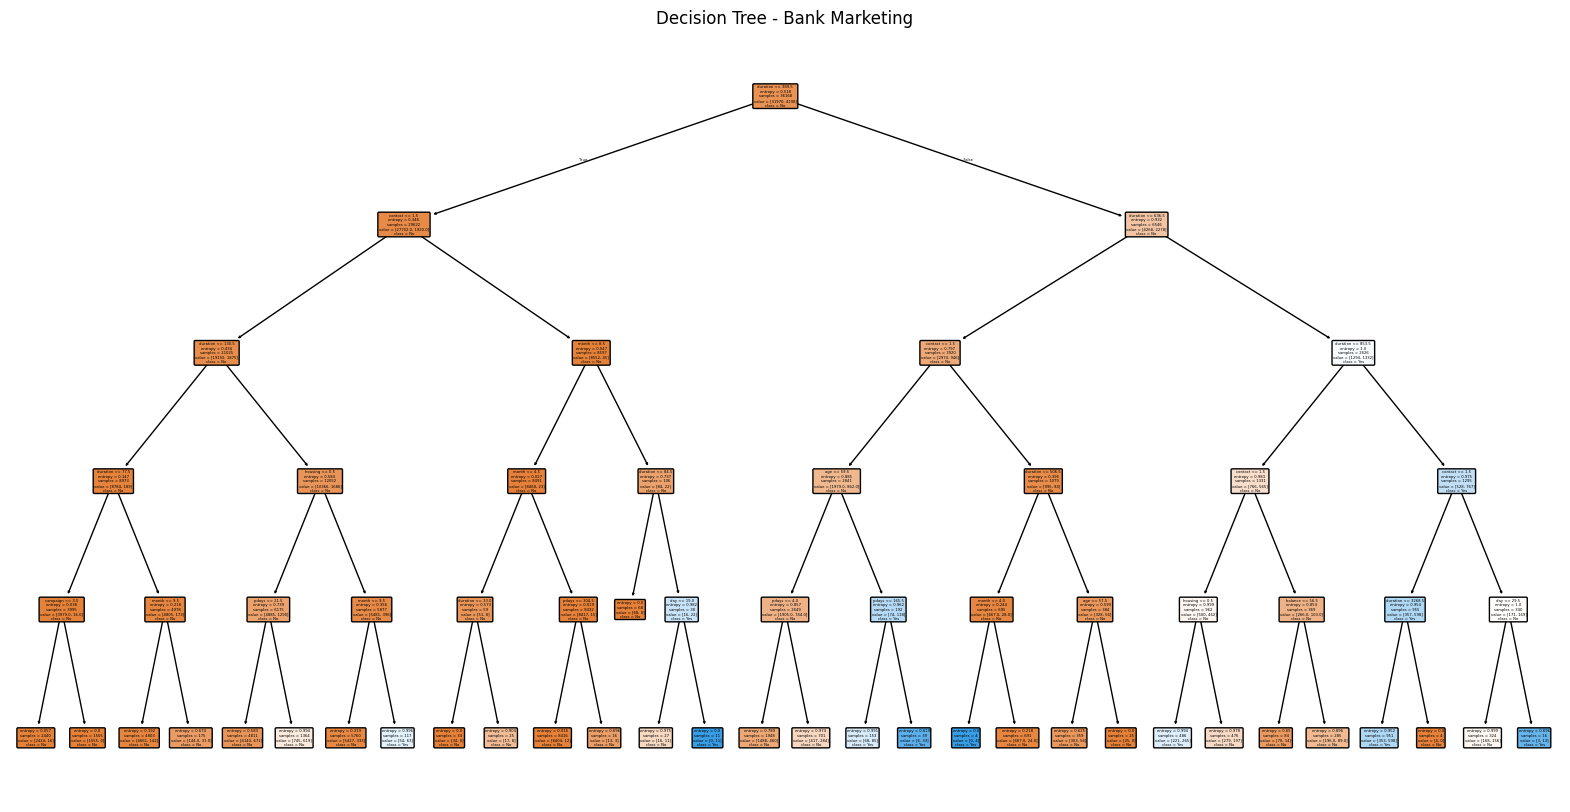

In [17]:
print("Visualize the Decision Tree")
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=["No", "Yes"], filled=True, rounded=True)
plt.title("Decision Tree - Bank Marketing")
plt.show()
